### Data cleaning

C:\Users\pawel\AppData\Local\Temp\ipykernel_13328\3481957565.py:103: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = colormap.get_cmap("magma")(normalized_data)


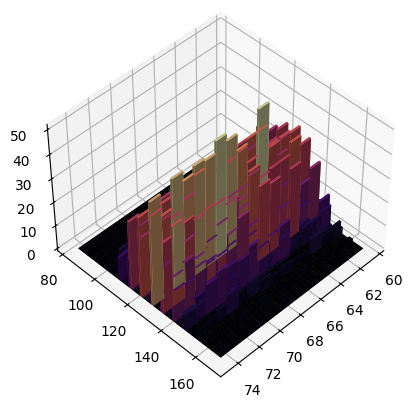

In [1]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import matplotlib.colors as colors
import matplotlib.cm as colormap

def Coeff_Corr(df:np.array, col1: int, col2:int) -> float:
    coeff_corr = np.corrcoef(df[:, col1], df[:, col2])[0, 1]

    return coeff_corr


def VisualizeData(df:np.array, col1:int, col2:int, figname:str = ""):
    figure = plt.figure()
    axes = figure.add_subplot(1, 1, 1)

    sns.scatterplot( x = df[:, col1], y = df[:, col2], size = 1)

    axes.grid(True)

    axes.set_xlabel(f"Feature {col1}", loc = "right")
    axes.set_ylabel(f"Feature {col2}", loc = "top")
    
    axes.spines[["top","right"]].set_visible(False)
    axes.spines[["left","bottom"]].set_position("center")


def Create_Histogram(data:np.array, bins:np.array):

    histogram = np.histogram(data, bins = bins)

    return histogram

    
def Corr_Bootstrap(df:np.array, N0:int, N:int, col1:int, col2:int):
    correl_df  = np.zeros(shape = [N0])

    
    for i in range(N0):
        sample = resample(df, replace= True, n_samples = N)

        corr_coeff = Coeff_Corr(sample, col1, col2)
        
        while corr_coeff == 0:
            sample = resample(df, replace= True, n_samples = N)
            corr_coeff = Coeff_Corr(sample, col1, col2)

        correl_df[i] = corr_coeff

    return correl_df





dane  = pl.read_csv("SOCR-HeightWeight.csv", separator = ",", has_header = True, n_rows = 5000).\
    cast(dtypes = {"Index":pl.Int16})

dane_numpy = dane.to_numpy()

col1 = 1
col2 = 2
step = 0.01


x = dane_numpy[:, col1]
y = dane_numpy[:, col2]


figure  = plt.figure()
axes = figure.add_subplot(1, 1,1, projection = "3d")

histogram_2d = np.histogram2d(x, y, 
                              bins = [ np.arange(min(x), max(x), 1),  np.arange(min(y), max(y), 1)  ])




x_edges = histogram_2d[1]
y_edges  = histogram_2d[2]

#Define the x-cordinate and y-cordinate of each bars.
x_cord, y_cord = np.meshgrid(x_edges[:-1], 
                             y_edges[:-1])
z_cord = np.zeros(shape = [x_cord.flatten().shape[0]])


#Define the x-length and y-length of each bar.
dx, dy = np.meshgrid(x_edges[1:] - x_edges[:-1]
                    , y_edges[1:]-y_edges[:-1])


dz = histogram_2d[0]


x_cord, y_cord, z_cord = x_cord.flatten(), y_cord.flatten(), z_cord.flatten()
dx, dy, dz = dx.flatten(), dy.flatten(), dz.flatten()


normalized_data = colors.Normalize(min(dz), max(dz))(dz)
cmap = colormap.get_cmap("magma")(normalized_data)


axes.bar3d(x_cord, y_cord, z_cord,
dx, dy, dz, color = cmap)

axes.view_init(45, 45)



